## CS109a Project - Lending Club

**Harvard University**<br/>
**Fall 2018**<br/>

Creators: Tim  Maounis and Dylan de Waart

In [135]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

Import libraries:

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

import seaborn as sns

<hr style='height:2pt'>
<div class='theme'> Data Cleaning </div> 

Import data

In [137]:
PATH_RAW = "../data/data_raw/"
#Only use 2018 Q3 for now...
df_a_raw = pd.read_csv(PATH_RAW+"accepted/A_2018_Q3.csv") #accepted dataframe
df_d_raw = pd.read_csv(PATH_RAW+"declined/D_2018_Q3.csv") #declined dataframe

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [138]:
df_a_old_raw = pd.read_csv(PATH_RAW+"accepted/A_2007-2011.csv") #accepted dataframe 2007-11

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [139]:
df_a_raw

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,30000.0,30000.0,30000.0,36 months,8.46%,946.48,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,10000.0,10000.0,10000.0,36 months,7.84%,312.63,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4200.0,4200.0,4200.0,36 months,13.56%,142.66,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,9000.0,9000.0,9000.0,36 months,6.11%,274.25,A,A1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,6000.0,6000.0,6000.0,36 months,7.84%,187.58,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,16500.0,16500.0,16500.0,36 months,13.56%,560.42,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,14400.0,14400.0,14400.0,60 months,16.91%,357.19,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,4000.0,4000.0,4000.0,36 months,7.84%,125.06,A,A4,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,16000.0,16000.0,16000.0,36 months,7.21%,495.58,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,20000.0,20000.0,20000.0,60 months,13.56%,460.82,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def print_row(df, row):
    for ctr,i in enumerate(df.iloc[row]):
        print (str(df.columns[ctr])+": "+str(i))

In [11]:
print_row(df_a_raw, 0)

id: nan
member_id: nan
loan_amnt: 30000.0
funded_amnt: 30000.0
funded_amnt_inv: 30000.0
term:  36 months
int_rate:   8.46%
installment: 946.48
grade: A
sub_grade: A5
emp_title: Mental Health Therapist
emp_length: 5 years
home_ownership: MORTGAGE
annual_inc: 70000.0
verification_status: Source Verified
issue_d: Sep-2018
loan_status: Issued
pymnt_plan: n
url: nan
desc: nan
purpose: medical
title: Medical expenses
zip_code: 562xx
addr_state: MN
dti: 37.12
delinq_2yrs: 0.0
earliest_cr_line: Sep-2002
inq_last_6mths: 0.0
mths_since_last_delinq: nan
mths_since_last_record: nan
open_acc: 9.0
pub_rec: 0.0
revol_bal: 8475.0
revol_util: 40%
total_acc: 57.0
initial_list_status: w
out_prncp: 30000.0
out_prncp_inv: 30000.0
total_pymnt: 0.0
total_pymnt_inv: 0.0
total_rec_prncp: 0.0
total_rec_int: 0.0
total_rec_late_fee: 0.0
recoveries: 0.0
collection_recovery_fee: 0.0
last_pymnt_d: nan
last_pymnt_amnt: 0.0
next_pymnt_d: Oct-2018
last_credit_pull_d: Oct-2018
collections_12_mths_ex_med: 0.0
mths_since_

In [24]:
df_a_raw.shape

(128196, 145)

In [25]:
df_d_raw.shape

(2585245, 9)

In [47]:
df_d_raw.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,3000.0,2018-07-01,Debt consolidation,NaN,100%,925xx,CA,< 1 year,0
1,40000.0,2018-07-01,Major purchase,NaN,7.45%,335xx,FL,< 1 year,0
2,16000.0,2018-07-01,Debt consolidation,NaN,34.93%,156xx,PA,< 1 year,0
3,40000.0,2018-07-01,Debt consolidation,NaN,27.87%,957xx,CA,< 1 year,0
4,300000.0,2018-07-01,Business Loan,NaN,-1%,258xx,TN,< 1 year,0


In [42]:
def stats_NAN(df):
    df_stats = pd.DataFrame(index=[df.columns], columns=["NaN Ratio"])
    for col in df.columns:
        df_stats["NaN Ratio"][col] = df[col].isna().sum()/len(df) #NaN ratio
    return df_stats

In [43]:
nan_stats_a = stats_NAN(df_a_raw)
display(nan_stats_a)

,NaN Ratio
id,0.999984
member_id,1
loan_amnt,1.56011e-05
funded_amnt,1.56011e-05
funded_amnt_inv,1.56011e-05
term,1.56011e-05
int_rate,1.56011e-05
installment,1.56011e-05
grade,1.56011e-05
sub_grade,1.56011e-05


In [15]:
nan_stats_d = stats_NAN(df_d_raw)
display(nan_stats_d)

,NaN Ratio
Amount Requested,0
Application Date,0
Loan Title,0
Risk_Score,0.971057
Debt-To-Income Ratio,0
Zip Code,0
State,0
Employment Length,0.0402619
Policy Code,0


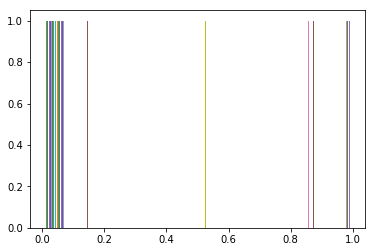

In [14]:
plt.hist(nan_stats_a);

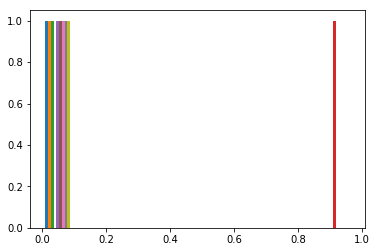

In [15]:
plt.hist(nan_stats_d);

In [44]:
def drop_NAN_cols(df, thresh, labels):
    df_copy = df.copy()
    count = 0
    for col in labels:
        ratio = df[col].isna().sum()/len(df) #NaN ratio
        if ratio >= threshold:
            df_copy = df_copy.drop(labels=[col])
            count+=1
    print(str(count)+ " features dropped")
    return df_copy

In [45]:
df_a_raw[["num_accts_ever_120_pd", "delinq_2yrs", "delinq_amnt"]].describe()

,num_accts_ever_120_pd,delinq_2yrs,delinq_amnt
count,128194.000000,128194.000000,128194.000000
mean,0.472846,0.229207,1.355266
std,1.389400,0.760923,181.795101
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,58.000000,58.000000,44925.000000


In [140]:
def nan_to_zero(df, labels):
    df_copy = df.copy(deep=True)
    for col in labels:
        df_copy[col] = df_copy[col].fillna(0, inplace=True)
    return df_copy

In [124]:
df_copy = df_a_raw.copy()
a = df_copy["num_accts_ever_120_pd"].fillna(0, inplace=True)

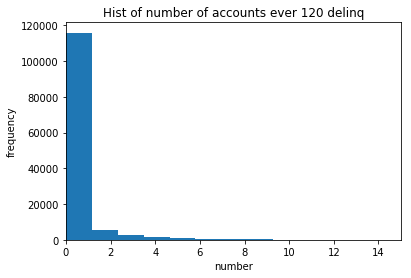

In [87]:
plt.hist(df_a_raw["num_accts_ever_120_pd"].fillna(0), bins=50)
plt.title("Hist of number of accounts ever 120 delinq")
plt.xlabel("number")
plt.xlim(0,15)
plt.ylabel("frequency");

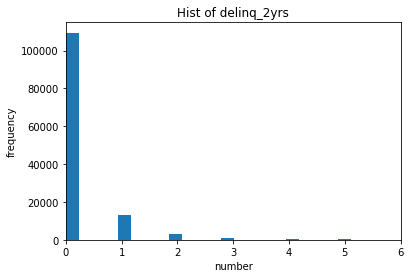

In [60]:
plt.hist(df_a_raw["delinq_2yrs"].fillna(0), bins=250)
plt.title("Hist of delinq_2yrs")
plt.xlabel("number")
plt.xlim(0,6)
plt.ylabel("frequency");

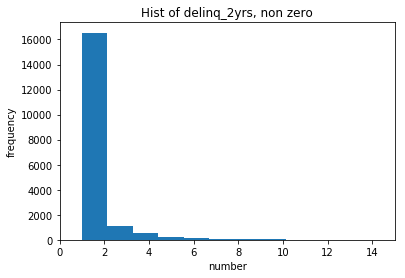

In [57]:
df_a_delinq2yrs = df_a_raw["delinq_2yrs"].fillna(0)
df_a_delinq2yrs = df_a_delinq2yrs[df_a_delinq2yrs!=0]
plt.hist(df_a_delinq2yrs, bins=50)
plt.title("Hist of delinq_2yrs, non zero")
plt.xlabel("number")
plt.xlim(0,15)
plt.ylabel("frequency");

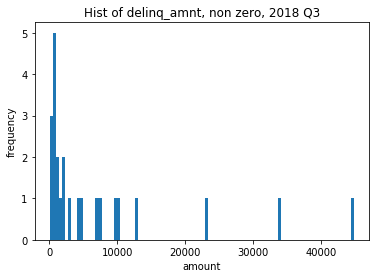

In [47]:
df_a_delinq0 = df_a_raw["delinq_amnt"].fillna(0)
df_a_delinq0 = df_a_delinq0[df_a_delinq0!=0]
plt.hist(df_a_delinq0, bins=100)
plt.title("Hist of delinq_amnt, non zero, 2018 Q3")
plt.xlabel("amount")
plt.ylabel("frequency");

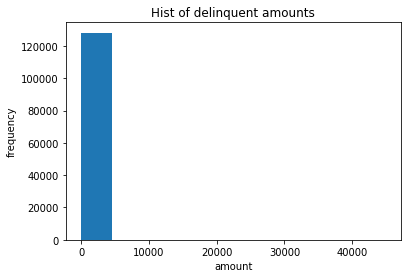

In [52]:
plt.hist(df_a_raw["delinq_amnt"].fillna(0))
plt.title("Hist of delinq_amnt")
plt.xlabel("amount")
plt.ylabel("frequency");

In [141]:
def convert_date(df, label, frmt):
    df_copy = df.copy()
    df_copy[label] = pd.to_datetime(df_copy[label], format=frmt)
    return df_copy

In [142]:
def convert_intr(df, label):
    df_copy = df.copy()
    df_copy[label] = df_copy[label].str.rstrip('%').astype('float') / 100.0
    return df_copy

In [143]:
df_old_date = convert_date(df_a_old_raw, "issue_d", "%b-%Y")

In [144]:
df_old_date = convert_intr(df_old_date, "int_rate")

In [145]:
df_old_A=df_old_date[df_old_date["grade"]=="A"].sort_values(by="issue_d")
df_old_B=df_old_date[df_old_date["grade"]=="B"].sort_values(by="issue_d")
df_old_C=df_old_date[df_old_date["grade"]=="C"].sort_values(by="issue_d")
df_old_D=df_old_date[df_old_date["grade"]=="D"].sort_values(by="issue_d")
df_old_E=df_old_date[df_old_date["grade"]=="E"].sort_values(by="issue_d")

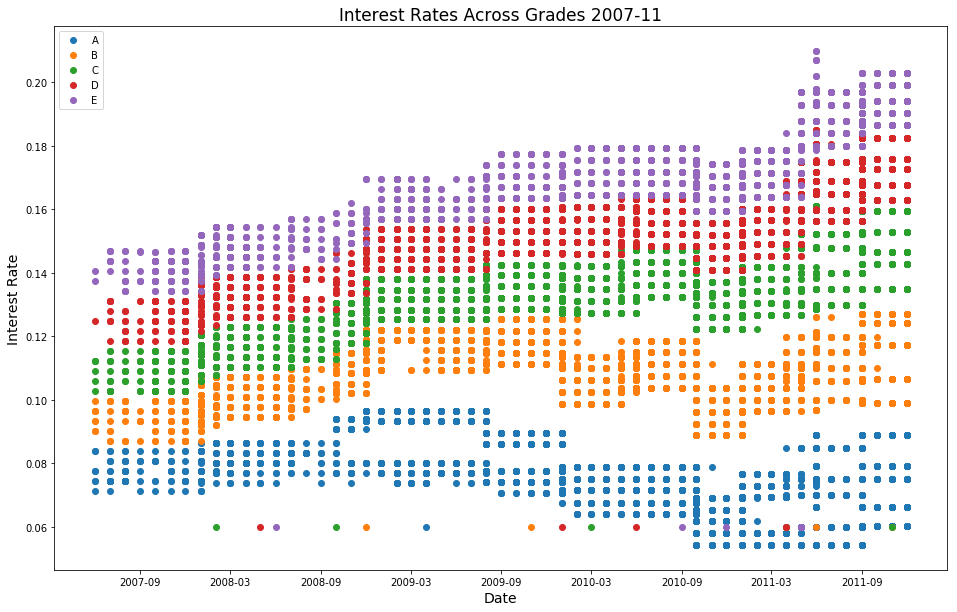

In [146]:
plt.figure(figsize=(16,10))
plt.title("Interest Rates Across Grades 2007-11", fontsize=17)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Interest Rate", fontsize=14)
plt.plot_date(x=df_old_A["issue_d"].dropna(),y=df_old_A["int_rate"].dropna(), label="A")
plt.plot_date(x=df_old_B["issue_d"].dropna(),y=df_old_B["int_rate"].dropna(), label="B")
plt.plot_date(x=df_old_C["issue_d"].dropna(),y=df_old_C["int_rate"].dropna(), label="C")
plt.plot_date(x=df_old_D["issue_d"].dropna(),y=df_old_D["int_rate"].dropna(), label="D")
plt.plot_date(x=df_old_E["issue_d"].dropna(),y=df_old_E["int_rate"].dropna(), label="E")
plt.legend();

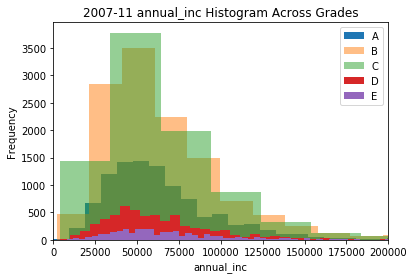

In [83]:
#grade income hist
plt.hist(x=df_old_A["annual_inc"].fillna(0), bins=200, label="A", stacked=True)
plt.hist(x=df_old_B["annual_inc"].fillna(0), bins=200, label="B", stacked=True, alpha=0.5)
plt.hist(x=df_old_C["annual_inc"].fillna(0), bins=200, label="C", stacked=True, alpha=0.5)
plt.hist(x=df_old_D["annual_inc"].fillna(0), bins=200, label="D", stacked=True)
plt.hist(x=df_old_E["annual_inc"].fillna(0), bins=200, label="E", stacked=True)
plt.xlim(0,200000)
plt.xlabel("annual_inc")
plt.ylabel("Frequency")
plt.title("2007-11 annual_inc Histogram Across Grades")
plt.legend();

Text(0,0.5,'Frequency')

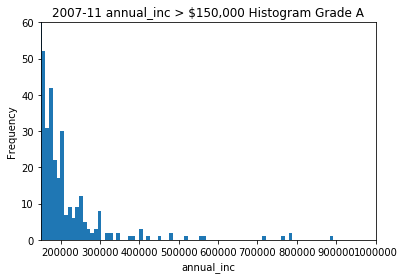

In [96]:
plt.hist(x=df_old_A["annual_inc"].fillna(0), bins=200, label="A")
plt.xlim(150000,1000000)
plt.ylim(0,60)
plt.title("2007-11 annual_inc > $150,000 Histogram Grade A")
plt.xlabel("annual_inc")
plt.ylabel("Frequency")

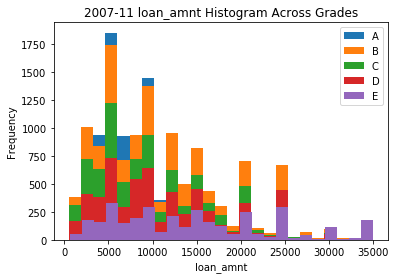

In [97]:
#grade loan_amount hist
bins=25
plt.hist(x=df_old_A["loan_amnt"].fillna(0), bins=bins, label="A")
plt.hist(x=df_old_B["loan_amnt"].fillna(0), bins=bins, label="B")
plt.hist(x=df_old_C["loan_amnt"].fillna(0), bins=bins, label="C")
plt.hist(x=df_old_D["loan_amnt"].fillna(0), bins=bins, label="D")
plt.hist(x=df_old_E["loan_amnt"].fillna(0), bins=bins, label="E")
plt.xlabel("loan_amnt")
plt.ylabel("Frequency")
plt.title("2007-11 loan_amnt Histogram Across Grades")
plt.legend();

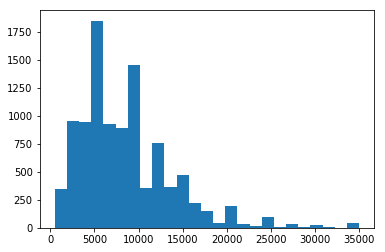

In [101]:
plt.hist(x=df_old_A["loan_amnt"].fillna(0), bins=bins, label="A");

In [147]:
def convert_dti(df, label):
    df[label] = df[label]/100
    return df

In [148]:
df_old_date = convert_dti(df_old_date, "dti")

In [149]:
def convert_percent(df, label):
    df_copy = df.copy()
    df_copy[label] = df_copy[label].str.rstrip('%').astype('float') / 100.0
    return df_copy

In [150]:
df_old_date = convert_percent(df_old_date, "revol_util")

In [151]:
df_old_hodum = pd.get_dummies(df_old_date, columns=["home_ownership"])

In [152]:
df_old_hodum.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1


In [115]:
pair_ftrs = ["num_accts_ever_120_pd","delinq_2yrs","delinq_amnt","loan_amnt","int_rate","grade","sub_grade",
             "annual_inc", "dti", "revol_bal","revol_util", "total_acc", "avg_cur_bal", 
             "pub_rec_bankruptcies", "tax_liens", "total_bal_ex_mort","total_il_high_credit_limit",
            "home_ownership_MORTGAGE", "home_ownership_NONE", "home_ownership_OTHER",
            "home_ownership_OWN", "home_ownership_RENT"]

In [123]:
df_old_hodum.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT'],
      dtype='object', length=149)

In [132]:
df_old_hodum = nan_to_zero(df_old_hodum, pair_ftrs)

In [153]:
df_old_hodum[pair_ftrs]

,num_accts_ever_120_pd,delinq_2yrs,delinq_amnt,loan_amnt,int_rate,grade,sub_grade,annual_inc,dti,revol_bal,...,avg_cur_bal,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,NaN,0.0,0.0,5000.0,0.1065,B,B2,24000.00,0.2765,13648.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1
1,NaN,0.0,0.0,2500.0,0.1527,C,C4,30000.00,0.0100,1687.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1
2,NaN,0.0,0.0,2400.0,0.1596,C,C5,12252.00,0.0872,2956.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1
3,NaN,0.0,0.0,10000.0,0.1349,C,C1,49200.00,0.2000,5598.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1
4,NaN,0.0,0.0,3000.0,0.1269,B,B5,80000.00,0.1794,27783.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1
5,NaN,0.0,0.0,5000.0,0.0790,A,A4,36000.00,0.1120,7963.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1
6,NaN,0.0,0.0,7000.0,0.1596,C,C5,47004.00,0.2351,17726.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1
7,NaN,0.0,0.0,3000.0,0.1864,E,E1,48000.00,0.0535,8221.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1
8,NaN,0.0,0.0,5600.0,0.2128,F,F2,40000.00,0.0555,5210.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,1,0
9,NaN,0.0,0.0,5375.0,0.1269,B,B5,15000.00,0.1808,9279.0,...,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1


TypeError: '<=' not supported between instances of 'NoneType' and 'NoneType'

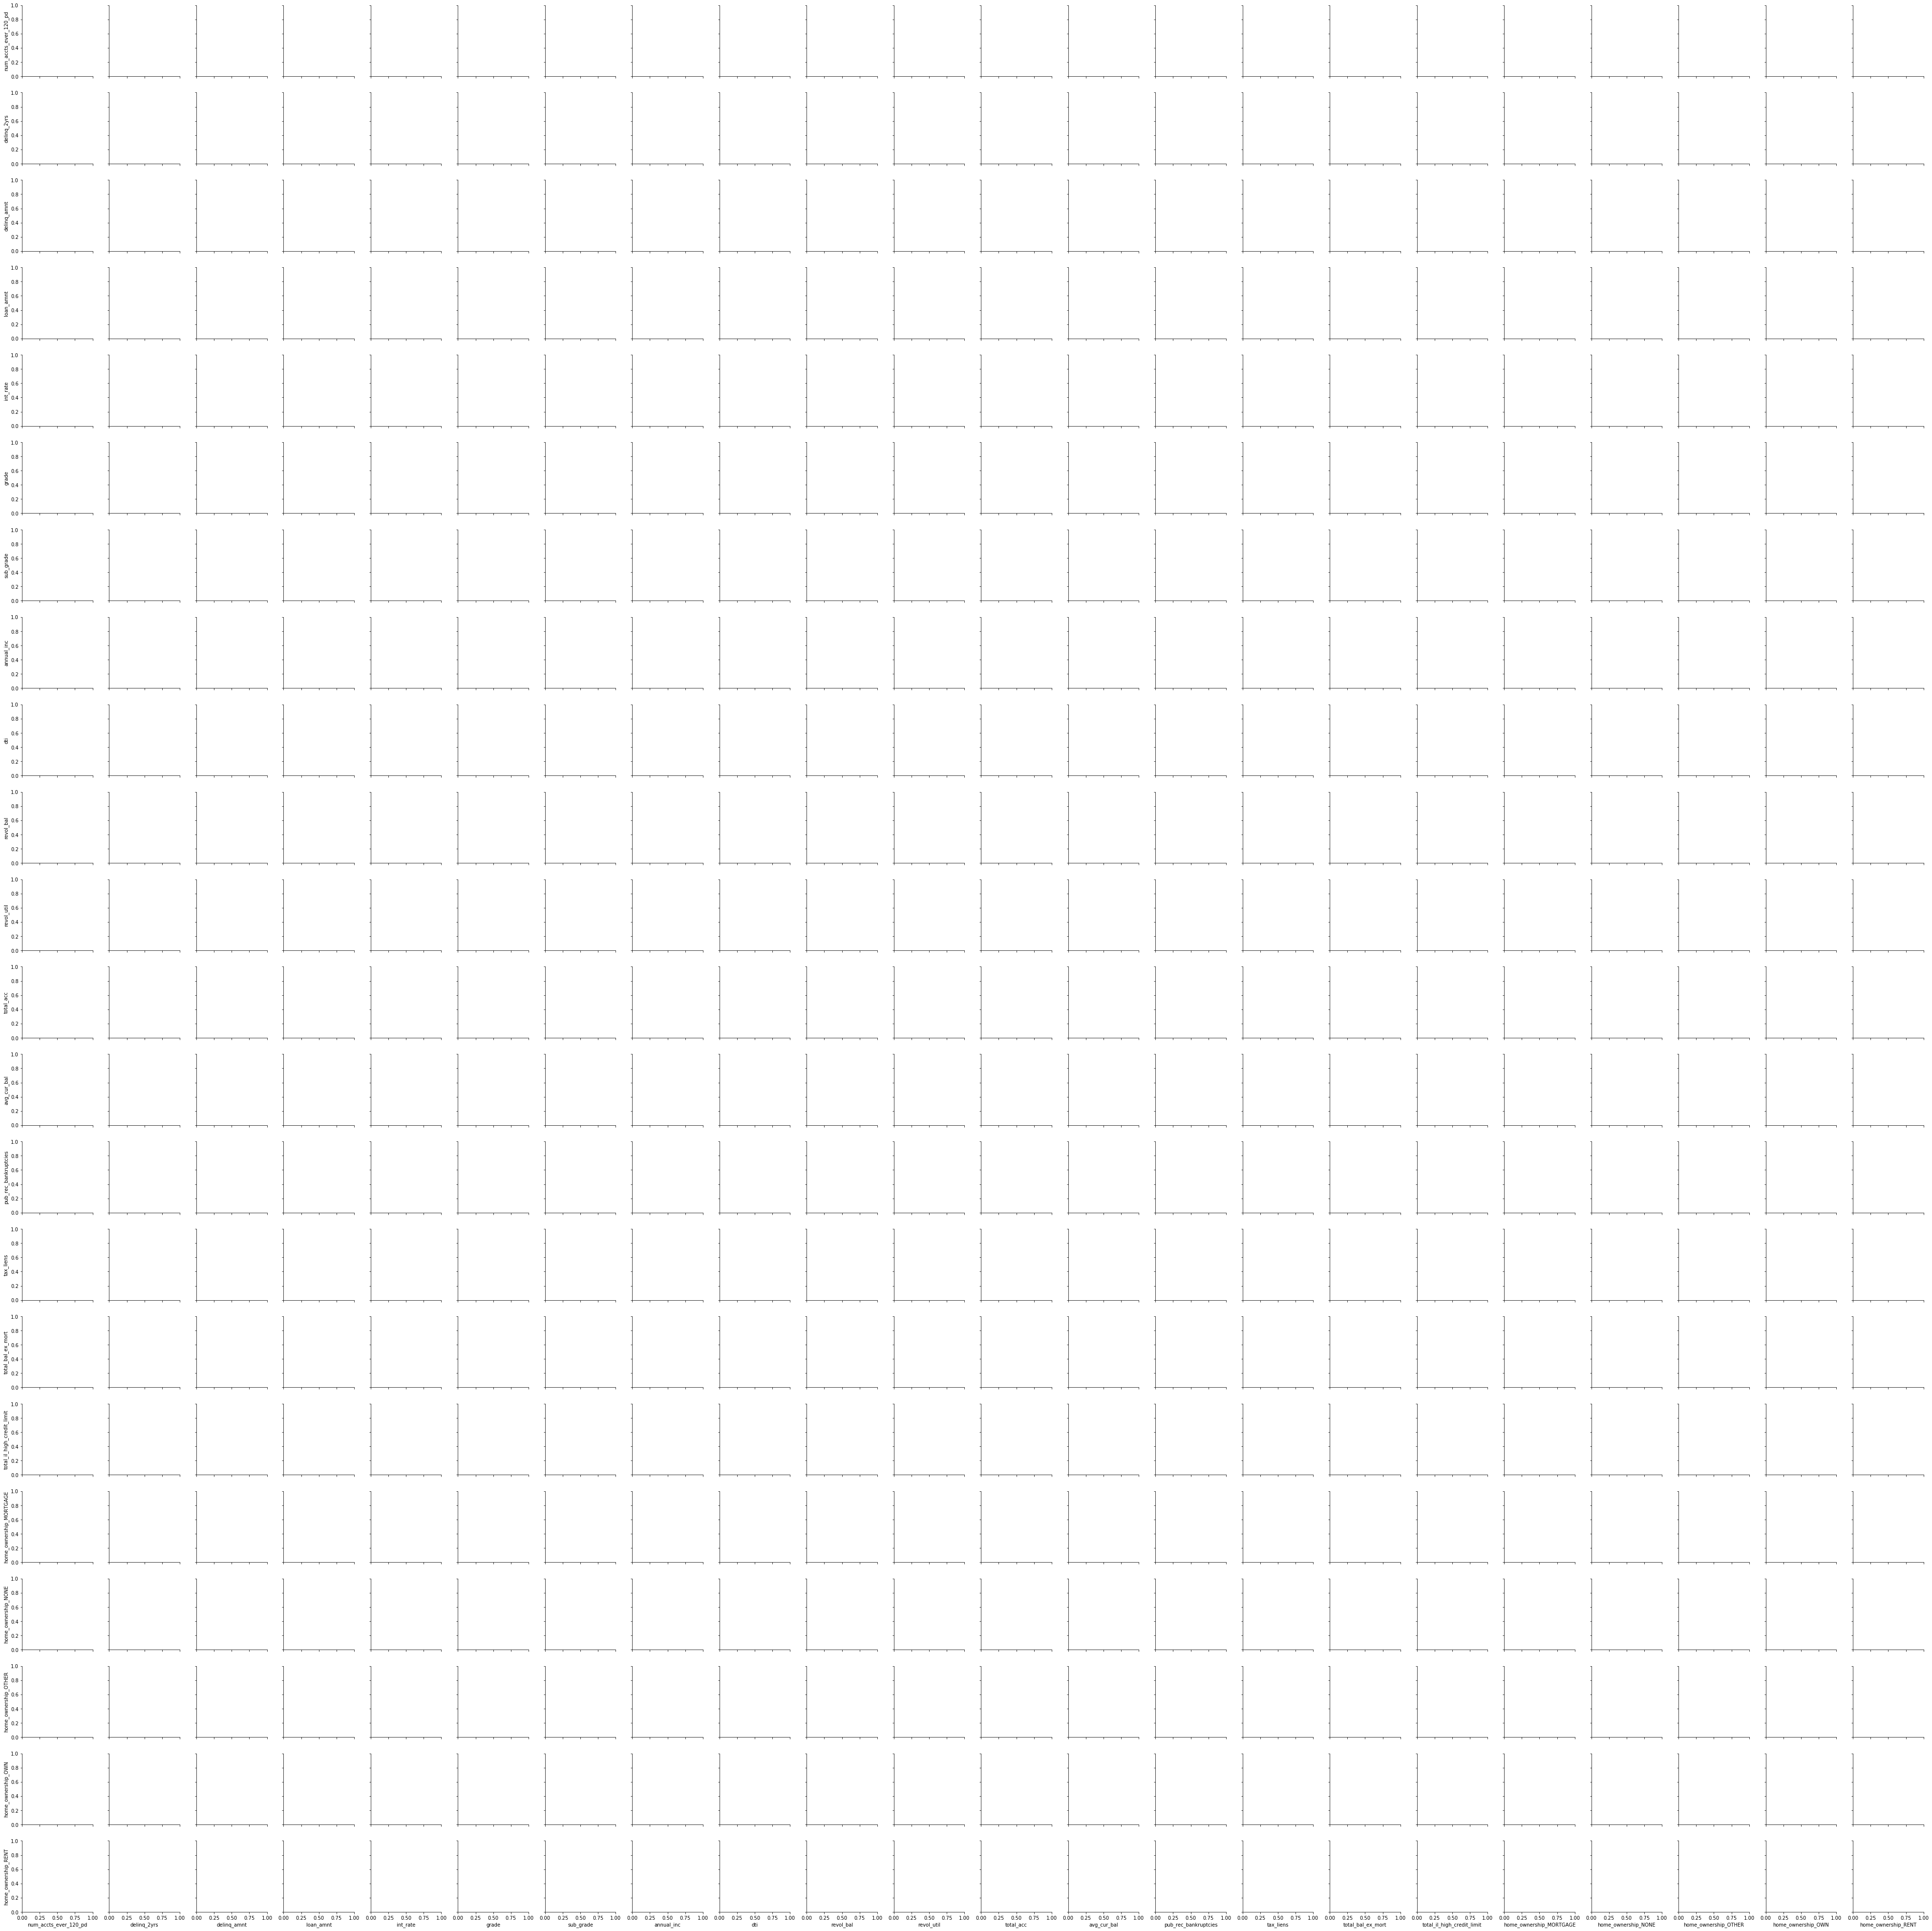

In [133]:
sns.pairplot(df_old_hodum[pair_ftrs])